Лабороторна робота 1.1 студента К. Д. Долматова

Варіант 3: Прогнозування діабету (Pima Indians Diabetes Dataset)

Опис: Прогнозування наявності діабету у пацієнтів на основі медичних характеристик.

Джерело даних: Pima Indians Diabetes Dataset

Код для завантаження:

import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

data = pd.read_csv(url, names=columns)

X = data.iloc[:, :-1].values

y = data.iloc[:, -1].values


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Завантаження датасету
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Ознаки та цільова змінна
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Нормалізація
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.costs = []

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear_model)

            # Функція вартості
            cost = -(1 / self.m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.costs.append(cost)

            # Градієнти
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            # Оновлення ваг
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
        return [1 if i > 0.5 else 0 for i in y_pred]


In [ ]:
model = LogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857


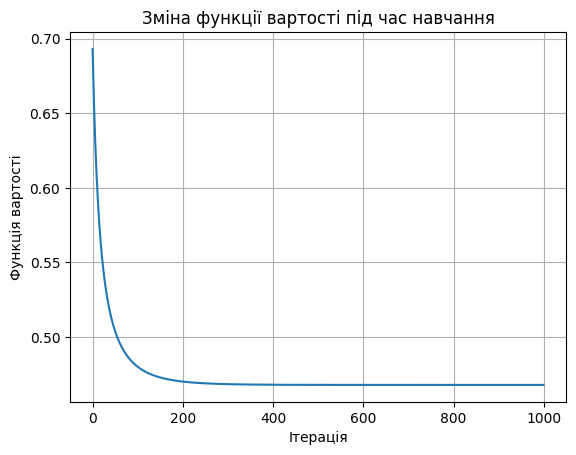

In [ ]:
plt.plot(range(len(model.costs)), model.costs)
plt.xlabel("Ітерація")
plt.ylabel("Функція вартості")
plt.title("Зміна функції вартості під час навчання")
plt.grid(True)
plt.show()


 Чим відрізняється логістична регресія від лінійної регресії?
Лінійна регресія прогнозує неперервні значення (реальні числа).

Логістична регресія прогнозує ймовірність приналежності до класу (класифікація, вихід — від 0 до 1).

2. У чому полягає роль сигмоїдної функції в логістичній регресії?
Сигмоїдна функція g(z) = 1 / (1 + e^(-z)) перетворює будь-яке число на діапазон (0, 1), що дозволяє інтерпретувати вихід як ймовірність належності до класу 1.

3. Чому для логістичної регресії не використовується функція вартості, як у лінійній регресії?
У логістичній регресії помилка не є квадратичною, тому замість MSE використовується логістична функція вартості (крос-ентропія), яка краще підходить для оцінки ймовірностей.

4. Які є способи запобігання перенавчанню (overfitting) в логістичній регресії?
Регуляризація (L1 або L2)

Зменшення розмірності даних

Більший обсяг тренувальної вибірки

Раннє зупинення навчання

Dropout (у більш складних моделях, наприклад нейронних мережах)

5. Як впливає параметр регуляризації λ на модель?
Чим більше λ, тим сильніше штрафуються великі ваги, що може зменшити перенавчання, але погіршити точність.

Чим менше λ, тим менше обмеження на ваги, що може призвести до перенавчання.

6. Як обчислити точність, precision, recall та F1-score для моделі класифікації?
Формули:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1-score = 2 × (Precision × Recall) / (Precision + Recall)

де:

TP — істинно позитивні

TN — істинно негативні

FP — хибно позитивні

FN — хибно негативні

7. Що таке матриця помилок (confusion matrix) і як її інтерпретувати?
Матриця помилок — це таблиця 2×2 для задачі бінарної класифікації, що показує кількість:

Правильних і неправильних прогнозів для кожного класу.

Структура:


Прогноз: 0	Прогноз: 1
Факт: 0	TN	FP
Факт: 1	FN	TP
8. Які переваги та недоліки логістичної регресії порівняно з іншими методами класифікації?
Переваги:

Простота реалізації та інтерпретації

Швидке тренування

Працює добре для лінійно роздільних даних

Недоліки:

Не працює добре з нелінійними залежностями

Чутлива до мультиколінеарності між ознаками

9. У яких випадках доцільно використовувати логістичну регресію, а в яких інші методи класифікації?
Використовуйте логістичну регресію, коли:

Є лінійна межа розділення між класами

Потрібна інтерпретація коефіцієнтів

Використовуйте інші методи (наприклад, дерева рішень, SVM, нейронні мережі), коли:

Є складні нелінійні залежності

Дані великі і потребують більш гнучкої моделі

10. Як можна інтерпретувати коефіцієнти моделі логістичної регресії?
Коефіцієнт показує, наскільки зміниться логарифм odds (співвідношення ймовірностей) при збільшенні ознаки на 1 одиницю.

Якщо коефіцієнт > 0 — ознака збільшує ймовірність класу 1.

Якщо коефіцієнт < 0 — ознака зменшує ймовірність класу 1.